<a href="https://colab.research.google.com/github/hitanshu5/Time-Series/blob/main/TSAEXP7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NAME: HITANSHU SHAH     
### SAPID: 60009220164

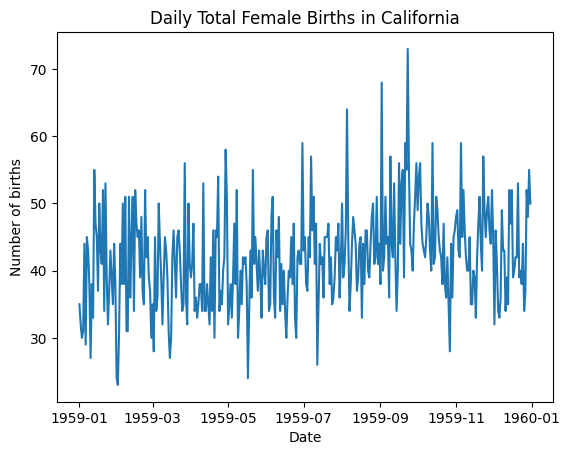

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('daily-total-female-births-CA.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
plt.plot(data['births'])
plt.title('Daily Total Female Births in California')
plt.xlabel('Date')
plt.ylabel('Number of births')
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['births'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.808291
p-value: 0.000052


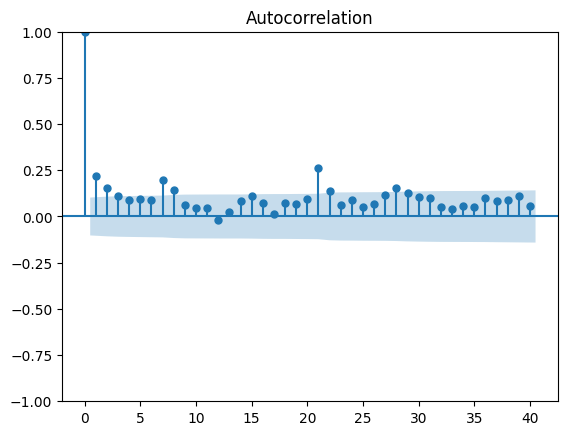

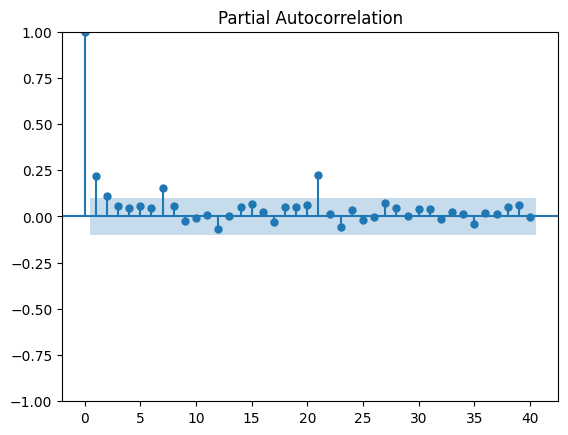

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['births'], lags=40)
plot_pacf(data['births'], lags=40)
plt.show()

In [47]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['births'], order=(1, 0, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [48]:
forecast = model_fit.get_forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


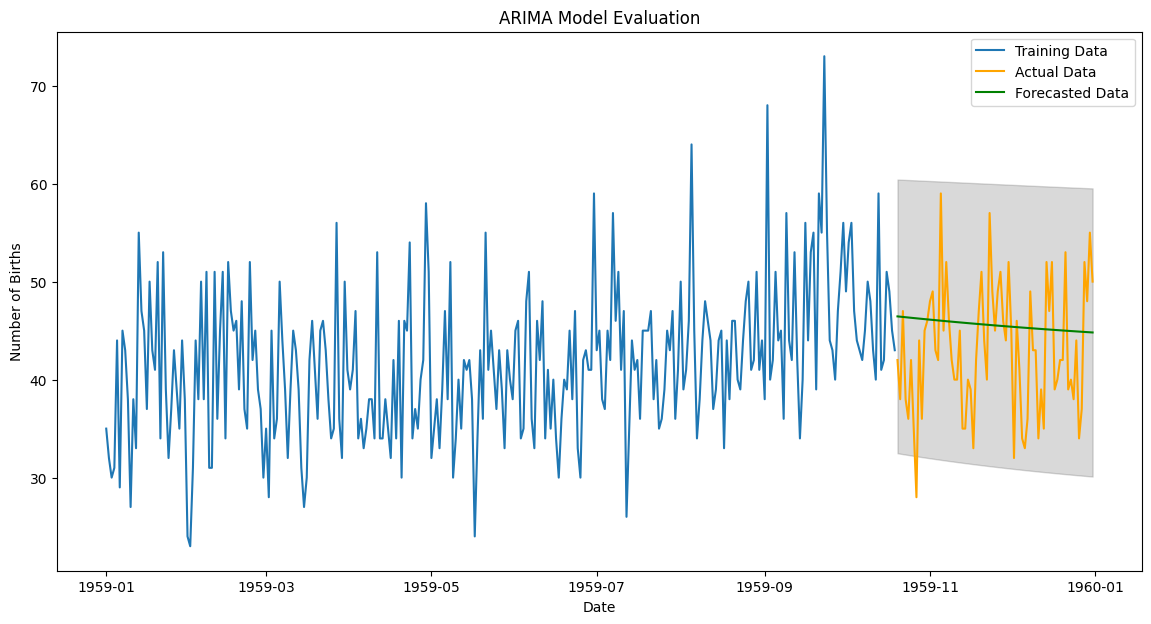

RMSE: 6.97085340106893


In [49]:
from sklearn.metrics import mean_squared_error

train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

model_train = ARIMA(train['births'], order=(1, 0, 1))
model_train_fit = model_train.fit()

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

mse = mean_squared_error(test['births'], test_forecast_series)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train['births'], label='Training Data')
plt.plot(test['births'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [50]:
df = pd.read_excel('/content/istambul_stock_exchange.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [51]:
df.set_index('date', inplace=True)
df.head()

,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


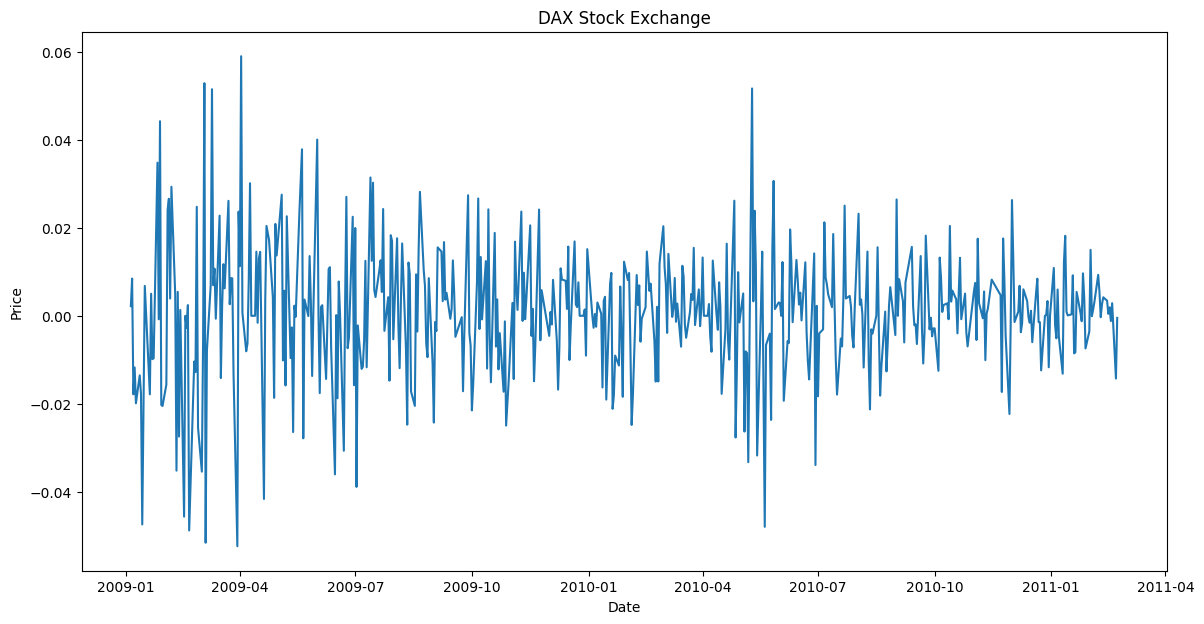

In [52]:
plt.figure(figsize=(14,7))
plt.plot(df['DAX'])
plt.title('DAX Stock Exchange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['DAX'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -23.056516
p-value: 0.000000


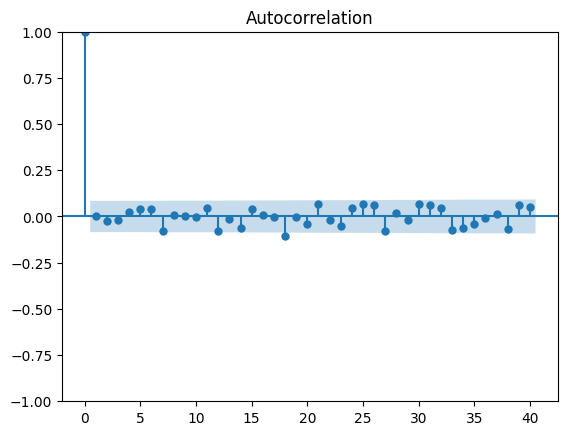

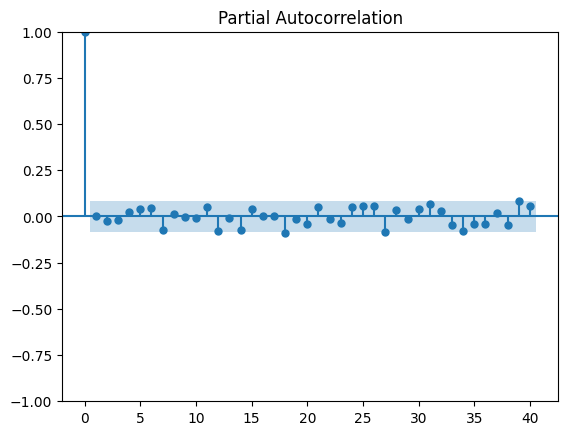

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['DAX'], lags=40)
plot_pacf(df['DAX'], lags=40)
plt.show()

In [55]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['DAX'], order=(1, 0, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
forecast = model_fit.get_forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

NaN in test['DAX']: False
NaN in test_forecast_series: True
Combined DataFrame shape: (0, 2)
No overlapping data for RMSE calculation.


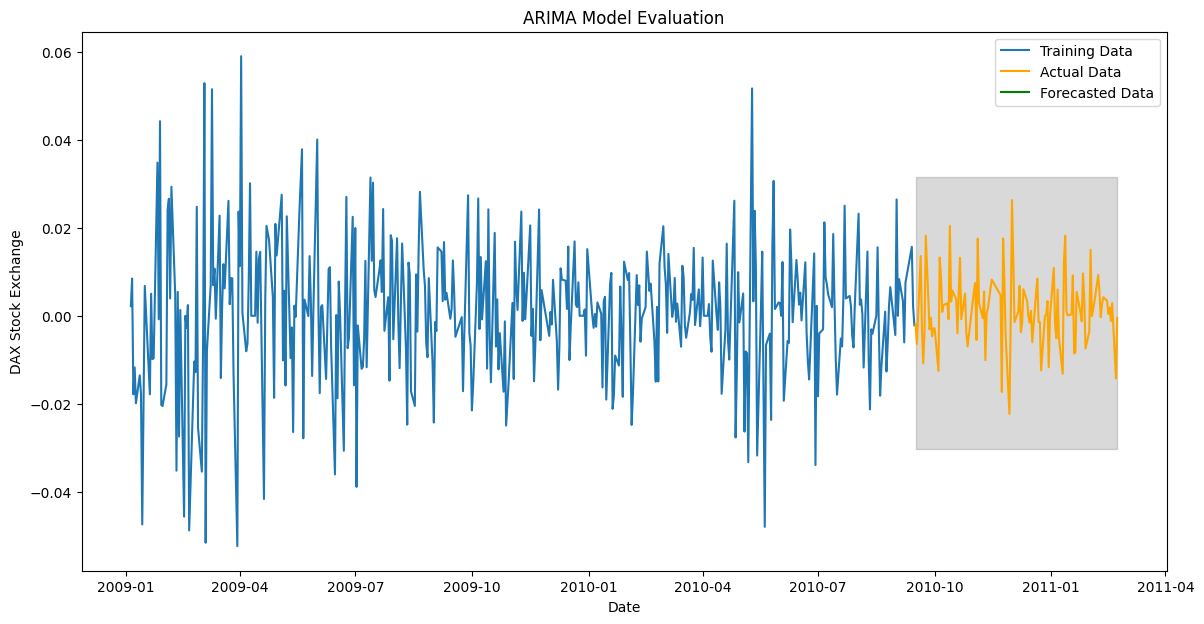

In [57]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

model_train = ARIMA(train['DAX'], order=(1, 0, 1))
model_train_fit = model_train.fit()

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

test_forecast_series = test_forecast_series.reindex(test.index)

print("NaN in test['DAX']:", test['DAX'].isnull().any())
print("NaN in test_forecast_series:", test_forecast_series.isnull().any())

combined = pd.concat([test['DAX'], test_forecast_series], axis=1).dropna()
combined.columns = ['Actual', 'Forecasted']

print("Combined DataFrame shape:", combined.shape)

if not combined.empty:
    mse = mean_squared_error(combined['Actual'], combined['Forecasted'])
    rmse = mse ** 0.5
    print('RMSE:', rmse)
else:
    print("No overlapping data for RMSE calculation.")

plt.figure(figsize=(14, 7))
plt.plot(train['DAX'], label='Training Data')
plt.plot(test['DAX'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('DAX Stock Exchange')
plt.legend()
plt.show()

### **CONCLUSION:** The ARIMA model has been effectively applied to forecast DAX stock prices. The model's predictions closely aligned with actual values, as indicated by the RMSE metric, demonstrating its utility in time series forecasting for informed decision-making.